# MDR Categorization & Case-Count Report Program
This program takes in a txt (csv-formatted) file generated from Boni Lab's Individual Based Microsimulation, and outputs a plot showing how many people are infected by Multiple-Drug-Resistant (MDR) Parasites, with their resistance strength, at each month.

## Function defs

### Parser Function - `parse`
This is the parser function that helps adding headings to the txt file, and then convert the columns in interest to dataframe.

The function also checks if the simulation was generated for single location ONLY. Currently the program does not support multiple location scenarios.

Input: `file_name` - path to the txt file to be parsed; `interested_col` - a list of number guiding which columns to tailor for returned dataframe.

Output: `df` - validated and tailored dataframe object (pandas required).

In [0]:
import pandas as pd
# Source: https://thispointer.com/python-how-to-insert-lines-at-the-top-of-a-file/
'''
Default columns that are selected are:
 #0 - Current Time
 #2 - Year
 #8 - Population
 #12 - Blood Slide Prevalence
 #22-149 - Parasite Count by Genotypes
'''

def parse(file_name, interested_col = [0,2,8,12] + list(range(22,150))):
  headline = "current_time\tsclock_to_time\tyear\tmonth\tday\tseasonal_fac\ttreated_p_5-\ttreated_p_5+\tpopulation\tsep\tEIR_loc_yr\tsep\tblood_slide_prev\tbsp_2_10\tbsp_0_5\tsep\tmonthly_new_inf\tsep\tmon_treatment\tsep\tmon_clinical_ep\tsep\tKNY--C1x\tKNY--C1X\tKNY--C2x\tKNY--C2X\tKNY--Y1x\tKNY--Y1X\tKNY--Y2x\tKNY--Y2X\tKYY--C1x\tKYY--C1X\tKYY--C2x\tKYY--C2X\tKYY--Y1x\tKYY--Y1X\tKYY--Y2x\tKYY--Y2X\tKNF--C1x\tKNF--C1X\tKNF--C2x\tKNF--C2X\tKNF--Y1x\tKNF--Y1X\tKNF--Y2x\tKNF--Y2X\tKYF--C1x\tKYF--C1X\tKYF--C2x\tKYF--C2X\tKYF--Y1x\tKYF--Y1X\tKYF--Y2x\tKYF--Y2X\tKNYNYC1x\tKNYNYC1X\tKNYNYC2x\tKNYNYC2X\tKNYNYY1x\tKNYNYY1X\tKNYNYY2x\tKNYNYY2X\tKYYYYC1x\tKYYYYC1X\tKYYYYC2x\tKYYYYC2X\tKYYYYY1x\tKYYYYY1X\tKYYYYY2x\tKYYYYY2X\tKNFNFC1x\tKNFNFC1X\tKNFNFC2x\tKNFNFC2X\tKNFNFY1x\tKNFNFY1X\tKNFNFY2x\tKNFNFY2X\tKYFYFC1x\tKYFYFC1X\tKYFYFC2x\tKYFYFC2X\tKYFYFY1x\tKYFYFY1X\tKYFYFY2x\tKYFYFY2X\tTNY--C1x\tTNY--C1X\tTNY--C2x\tTNY--C2X\tTNY--Y1x\tTNY--Y1X\tTNY--Y2x\tTNY--Y2X\tTYY--C1x\tTYY--C1X\tTYY--C2x\tTYY--C2X\tTYY--Y1x\tTYY--Y1X\tTYY--Y2x\tTYY--Y2X\tTNF--C1x\tTNF--C1X\tTNF--C2x\tTNF--C2X\tTNF--Y1x\tTNF--Y1X\tTNF--Y2x\tTNF--Y2X\tTYF--C1x\tTYF--C1X\tTYF--C2x\tTYF--C2X\tTYF--Y1x\tTYF--Y1X\tTYF--Y2x\tTYF--Y2X\tTNYNYC1x\tTNYNYC1X\tTNYNYC2x\tTNYNYC2X\tTNYNYY1x\tTNYNYY1X\tTNYNYY2x\tTNYNYY2X\tTYYYYC1x\tTYYYYC1X\tTYYYYC2x\tTYYYYC2X\tTYYYYY1x\tTYYYYY1X\tTYYYYY2x\tTYYYYY2X\tTNFNFC1x\tTNFNFC1X\tTNFNFC2x\tTNFNFC2X\tTNFNFY1x\tTNFNFY1X\tTNFNFY2x\tTNFNFY2X\tTYFYFC1x\tTYFYFC1X\tTYFYFC2x\tTYFYFC2X\tTYFYFY1x\tTYFYFY1X\tTYFYFY2x\tTYFYFY2X\tsep\tKNY--C1x\tKNY--C1X\tKNY--C2x\tKNY--C2X\tKNY--Y1x\tKNY--Y1X\tKNY--Y2x\tKNY--Y2X\tKYY--C1x\tKYY--C1X\tKYY--C2x\tKYY--C2X\tKYY--Y1x\tKYY--Y1X\tKYY--Y2x\tKYY--Y2X\tKNF--C1x\tKNF--C1X\tKNF--C2x\tKNF--C2X\tKNF--Y1x\tKNF--Y1X\tKNF--Y2x\tKNF--Y2X\tKYF--C1x\tKYF--C1X\tKYF--C2x\tKYF--C2X\tKYF--Y1x\tKYF--Y1X\tKYF--Y2x\tKYF--Y2X\tKNYNYC1x\tKNYNYC1X\tKNYNYC2x\tKNYNYC2X\tKNYNYY1x\tKNYNYY1X\tKNYNYY2x\tKNYNYY2X\tKYYYYC1x\tKYYYYC1X\tKYYYYC2x\tKYYYYC2X\tKYYYYY1x\tKYYYYY1X\tKYYYYY2x\tKYYYYY2X\tKNFNFC1x\tKNFNFC1X\tKNFNFC2x\tKNFNFC2X\tKNFNFY1x\tKNFNFY1X\tKNFNFY2x\tKNFNFY2X\tKYFYFC1x\tKYFYFC1X\tKYFYFC2x\tKYFYFC2X\tKYFYFY1x\tKYFYFY1X\tKYFYFY2x\tKYFYFY2X\tTNY--C1x\tTNY--C1X\tTNY--C2x\tTNY--C2X\tTNY--Y1x\tTNY--Y1X\tTNY--Y2x\tTNY--Y2X\tTYY--C1x\tTYY--C1X\tTYY--C2x\tTYY--C2X\tTYY--Y1x\tTYY--Y1X\tTYY--Y2x\tTYY--Y2X\tTNF--C1x\tTNF--C1X\tTNF--C2x\tTNF--C2X\tTNF--Y1x\tTNF--Y1X\tTNF--Y2x\tTNF--Y2X\tTYF--C1x\tTYF--C1X\tTYF--C2x\tTYF--C2X\tTYF--Y1x\tTYF--Y1X\tTYF--Y2x\tTYF--Y2X\tTNYNYC1x\tTNYNYC1X\tTNYNYC2x\tTNYNYC2X\tTNYNYY1x\tTNYNYY1X\tTNYNYY2x\tTNYNYY2X\tTYYYYC1x\tTYYYYC1X\tTYYYYC2x\tTYYYYC2X\tTYYYYY1x\tTYYYYY1X\tTYYYYY2x\tTYYYYY2X\tTNFNFC1x\tTNFNFC1X\tTNFNFC2x\tTNFNFC2X\tTNFNFY1x\tTNFNFY1X\tTNFNFY2x\tTNFNFY2X\tTYFYFC1x\tTYFYFC1X\tTYFYFC2x\tTYFYFC2X\tTYFYFY1x\tTYFYFY1X\tTYFYFY2x\tTYFYFY2X\tsep\t\t"
  
  # Start - Cited Codes
  # define name of temporary dummy file
  dummy_file = file_name + '_parsed.txt'
  # open original file in read mode and dummy file in write mode
  with open(file_name, 'r') as read_obj, open(dummy_file, 'w') as write_obj:
    # Write given line to the dummy file
    write_obj.write(headline + '\n')
    # Read lines from original file one by one and append them to the dummy file
    for line in read_obj:
      write_obj.write(line)
  # End - Cited Codes

  df = pd.read_csv(dummy_file, sep='\t')

  # Check if file is single-location'd
  if len(df.columns) == 282:
    # Return tailored df
    df = df.iloc[:,interested_col]
    return df
  
  # Error if file not single-location'd
  return None

### Drug Resistant Strength Calculation Function - `resistant_strength_calc`
Input: `pattern` takes in malaria geno-type encoding. e.g. 'KNF--C1x'; 
`drugset` takes in a list of drug abbreviations (e.g. 'A', 'PPQ', etc.) that are interested for the scenario; `option` takes in a number `1` or `2`.

Output: This function evaluates the Malaria encoding pattern and counts how many drugs (in the set) is this genotype resistant to. The function also counts the number of genetic (mutation) events happened regarding this genotype. For option 1, the function returns `drugnum` indicating how many drugs in the set is this pattern resistant to, and `eventcount` indicating how many mutation events happened to this genotype; for option 2, `drugnum` is the same while `allelecount` breaks down the mutation events to each allel, e.g. '11000000' indicates mutations at *K76T* and *N86Y* when using Amodiaquine (AQ).

In [0]:
def resistant_strength_calc(pattern, drugset, option=1):

  # TODO - Support more drug set combinations
  if len(drugset) != 2:
    return "only support two drugs!"

  # Do not support LM and AQ together.
  if 'LM' in drugset and 'AQ' in drugset:
    return "not supporting LM & AQ together yet"
        
  drugnum = 0
  allelecount = '00000000'
    
  if 'A' in drugset and pattern[5:6] == 'Y': # Artemisinin Resistant
    drugnum += 1
    allelecount = allelecount[0:5] + '1' + allelecount[6:]
        
  if 'PPQ' in drugset and pattern[6:7] == '2': # PPQ Resistant
    drugnum += 1
    allelecount = allelecount[0:6] + '1' + allelecount[7:]
        
  if 'LM' in drugset and pattern[0:3] != 'TYY': # LM Resistant
    drugnum += 1
    if pattern[0:1] == 'K': # K76T
      allelecount = '1' + allelecount[1:]
    if pattern[1:2] == 'N': # N86Y
      allelecount = allelecount[0:1] + '1' + allelecount[2:]
    if pattern[2:3] == 'F': # Y184F
      allelecount = allelecount[0:2] + '1' + allelecount[3:]
            
  if 'AQ' in drugset and pattern[0:3] != 'KNF': # AQ Resistant
    drugnum += 1
    if pattern[0:1] == 'T': # K76T
      allelecount = '1' + allelecount[1:]
    if pattern[1:2] == 'Y': # N86Y
      allelecount = allelecount[0:1] + '1' + allelecount[2:]
    if pattern[2:3] == 'Y': # Y184F
      allelecount = allelecount[0:2] + '1' + allelecount[3:]
            
  if 'MQ' in drugset: # MQ
    if not (pattern[1:2] == 'Y' and pattern[4:5] == '--'): # If Resistance exists
      drugnum += 1
      if pattern[1:2] == 'N': # N86Y
        allelecount = allelecount[0:1] + '1' + allelecount[2:]
      if pattern[3:5] != '--': # Double Copy N86Y & Y184F
        allelecount = allelecount[0:3] + '1-' + allelecount[5:]
            
  if option == 1:
    eventcount = allelecount.count('1')
    return ("%s-%s" % (drugnum, eventcount))
  return ("%s-%s" % (drugnum, allelecount))

### Dataframe Column Name Replace Function - `df_col_replace`
Input: `df` - dataframe object to be replaced; `drugset` - a set of drugs deployed for the simulation and thus we are interested in analyzing.

Output: `df` - parsed dataframe object where genotype encodings have been replaced by their correponding drug-resistance-strength, in column names. The parsed dataframe also groups the columns with the same drug-resistance-strength.

In [0]:
def df_col_replace(df, drugset):
  encodingdb = ['KNY--C1x', 'KNY--C1X', 'KNY--C2x', 'KNY--C2X', 'KNY--Y1x', 'KNY--Y1X', 'KNY--Y2x', 'KNY--Y2X', 'KYY--C1x', 'KYY--C1X', 'KYY--C2x', 'KYY--C2X', 'KYY--Y1x', 'KYY--Y1X', 'KYY--Y2x', 'KYY--Y2X', 'KNF--C1x', 'KNF--C1X', 'KNF--C2x', 'KNF--C2X', 'KNF--Y1x', 'KNF--Y1X', 'KNF--Y2x', 'KNF--Y2X', 'KYF--C1x', 'KYF--C1X', 'KYF--C2x', 'KYF--C2X', 'KYF--Y1x', 'KYF--Y1X', 'KYF--Y2x', 'KYF--Y2X', 'KNYNYC1x', 'KNYNYC1X', 'KNYNYC2x', 'KNYNYC2X', 'KNYNYY1x', 'KNYNYY1X', 'KNYNYY2x', 'KNYNYY2X', 'KYYYYC1x', 'KYYYYC1X', 'KYYYYC2x', 'KYYYYC2X', 'KYYYYY1x', 'KYYYYY1X', 'KYYYYY2x', 'KYYYYY2X', 'KNFNFC1x', 'KNFNFC1X', 'KNFNFC2x', 'KNFNFC2X', 'KNFNFY1x', 'KNFNFY1X', 'KNFNFY2x', 'KNFNFY2X', 'KYFYFC1x', 'KYFYFC1X', 'KYFYFC2x', 'KYFYFC2X', 'KYFYFY1x', 'KYFYFY1X', 'KYFYFY2x', 'KYFYFY2X', 'TNY--C1x', 'TNY--C1X', 'TNY--C2x', 'TNY--C2X', 'TNY--Y1x', 'TNY--Y1X', 'TNY--Y2x', 'TNY--Y2X', 'TYY--C1x', 'TYY--C1X', 'TYY--C2x', 'TYY--C2X', 'TYY--Y1x', 'TYY--Y1X', 'TYY--Y2x', 'TYY--Y2X', 'TNF--C1x', 'TNF--C1X', 'TNF--C2x', 'TNF--C2X', 'TNF--Y1x', 'TNF--Y1X', 'TNF--Y2x', 'TNF--Y2X', 'TYF--C1x', 'TYF--C1X', 'TYF--C2x', 'TYF--C2X', 'TYF--Y1x', 'TYF--Y1X', 'TYF--Y2x', 'TYF--Y2X', 'TNYNYC1x', 'TNYNYC1X', 'TNYNYC2x', 'TNYNYC2X', 'TNYNYY1x', 'TNYNYY1X', 'TNYNYY2x', 'TNYNYY2X', 'TYYYYC1x', 'TYYYYC1X', 'TYYYYC2x', 'TYYYYC2X', 'TYYYYY1x', 'TYYYYY1X', 'TYYYYY2x', 'TYYYYY2X', 'TNFNFC1x', 'TNFNFC1X', 'TNFNFC2x', 'TNFNFC2X', 'TNFNFY1x', 'TNFNFY1X', 'TNFNFY2x', 'TNFNFY2X', 'TYFYFC1x', 'TYFYFC1X', 'TYFYFC2x', 'TYFYFC2X', 'TYFYFY1x', 'TYFYFY1X', 'TYFYFY2x', 'TYFYFY2X']
  replacedict = {}
  for genotype in encodingdb:
    replacedict[genotype] = resistant_strength_calc(genotype, drugset)

  # Replace Column names with their corresponding MDR Strength   
  df.rename(columns=replacedict,inplace=True)

  # Sum-up the columns sharing the same name and return
  return df.groupby(by=df.columns, axis=1).sum()

### Blood Slide Prevalence Plot Function - `bsp_plot`
This function takes in the parsed dataframe `df`, and returns the plot of Blood Slide Prevalence (population count) against time (years).

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def bsp_plot(df, xlocator=5*365):
  plt.rcParams['figure.figsize'] = [12, 6]
  fig, ax1 = plt.subplots()

  scale_x = 365
  ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))

  ax1.plot(df['current_time'], df['blood_slide_prev'])
  ax1.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
  ax1.xaxis.set_major_formatter(ticks_x)
  ax1.set_xlabel('Years')
  ax1.set_ylabel('Percentage of Population')
  ax1.set_title('Blood Slide Prevalence Plot')

  plt.grid()
  return ax1

### MDR Parasite Population Plot - `mdr_ppc_plot`
This function takes in the processed dataframe, that is being column-name-reaplced and same-column-combined, and plots the parasite population count against time, including all MDR cases represented by different colors, with a legend.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def mdr_ppc_plot(df, xlocator=5*365, xlabel='Years', ylabel='Parasite Frequency', title='Parasite Frequency Plot by MDR Case'):
  plt.rcParams['figure.figsize'] = [12, 6]
  col_names = list(df.columns)
  mdr_cases = col_names[:-4] # Last four columns are not about MDR
  legend_color = {
    "0-0": "#CCE5FF", # blue for wild type
    "1-1": "#FAD996", # light orange
    "1-2": "#FFAB00", # medium orange
    "1-3": "#C76400", # dark orange
    "2-1": "#F09187", # light red
    "2-2": "#FF1A00", # medium red
    "2-3": "#A91606", # dark red
    "2-4": "k"
  }

  fig, ax1 = plt.subplots()

  scale_x = 365
  ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))

  # Plot each MDR case with different color
  for mdr_case in mdr_cases:
    plt.plot(df['current_time'], df[mdr_case], label=mdr_case, color=legend_color.get(mdr_case))

  ax1.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
  ax1.xaxis.set_major_formatter(ticks_x)
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel(ylabel)
  ax1.set_title(title)

  plt.legend()
  plt.grid()
  return ax1

### ARCHIVED - MDR Pattern Generating Function
This was the old function developed to generate all possible combinations given a set of drugs. This function was later replaced by the MDR Allel Event Counting function.

```
def MDR_pattern_generate(drugset):
    if len(drugset) != 2:
        return "only support two drugs!"
    if 'LM' in drugset and 'AQ' in drugset:
        return "not supporting LM & AQ together yet"
    result = {}
    complete_wild_pattern = '........'
    n = 1
    
    if 'A' in drugset: # Generate Pattern for Artemisinin
        complete_wild_pattern = complete_wild_pattern[0:5] + 'C' + complete_wild_pattern[6:]
        key = 'Res-Only-to-#%s' % n
        result.update({key:'.....Y..'})
        result.update({'double':'.....Y..'}) # to be updated later when second drug is seen
        n += 1 # notify other drug that A has been seen
    
    if 'PPQ' in drugset:
        complete_wild_pattern = complete_wild_pattern[0:6] + '1' + complete_wild_pattern[7:]
        
        if n == 1: # if PPQ is the first in the set
            result.update({'Res-Only-to-#1':'......2.'})
            result.update({'double':'......2.'}) # to be updated later when second drug is seen
        
        else: # if some other drug has been seen before
            
            ## when the complete wild pattern is updated
            ## all just-n values need to be updated too
            prev_key = 'Res-Only-to-#%s' % (n-1)
            prev_res = result[prev_key]
            # make it sensitive to PPQ but resistant to prev drug
            prev_res = prev_res[0:6] + '1' + prev_res[7:]
            result[prev_key] = prev_res # update pattern for previous drug
            
            ppqkey = 'Res-Only-to-#%s' % n
            # Res to PPQ and sensitive to all other drugs
            ppqvalue = complete_wild_pattern = complete_wild_pattern[0:6] + '2' + complete_wild_pattern[7:]
            result.update({ppqkey:ppqvalue}) # insert pattern for Just PPQ
            
            # update pattern for double resistant
            double_res = result['double']
            double_res = double_res[0:6] + '2' + double_res[7:]
            result['double'] = double_res
    
    if 'LM' in drugset:
        complete_wild_pattern = 'TYY' + complete_wild_pattern[3:]
        if n == 1: # if LM is the first in the set
            result.update({'Res-Only-to-#1-Stren1':'......2.'})
            result.update({'double':'......2.'}) # to be updated later when second drug is seen
    
    return result
```

## Main Function - Start Here

In [0]:
# Need to define your own variables here
#filepath = "youdefinehere"
filepath = "5.txt"
drugset = ['A','PPQ']

# Parse the output file and check if single-location'd
df = parse(filepath)
if (df is None):
  print("Parsed Error. Not a single-location'd file")

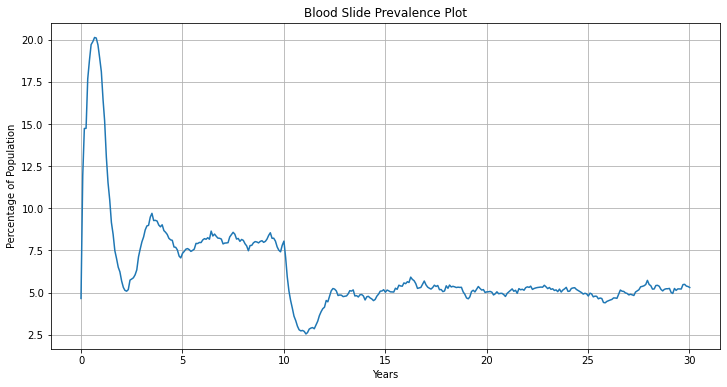

In [7]:
# Plot blood slide prevalence
bsp_plot(df)

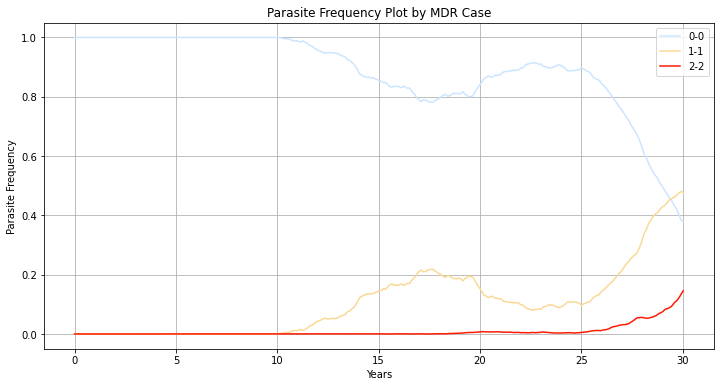

In [8]:
# Analyze MDR cases and further process the dataframe
mdr_parsed_df = df_col_replace(df, drugset)
# And plot parasite count by case plot
mdr_ppc_plot(mdr_parsed_df)